# STEP 1 - Dataset Exploration

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, fashion_mnist

In [ ]:
# Load datasets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

In [ ]:
# Normalize the datasets
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0
x_train_fashion, x_test_fashion = x_train_fashion / 255.0, x_test_fashion / 255.0

In [ ]:
# Expand dimensions to fit CNN input requirements
x_train_mnist = x_train_mnist[..., None]
x_test_mnist = x_test_mnist[..., None]
x_train_fashion = x_train_fashion[..., None]
x_test_fashion = x_test_fashion[..., None]

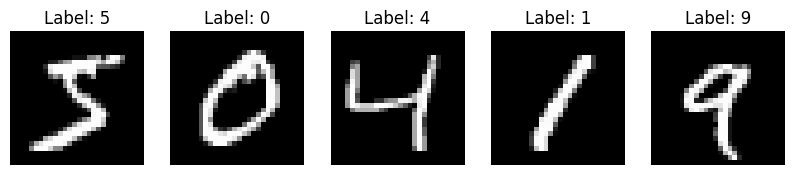

In [ ]:
# Visualize samples from MNIST
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train_mnist[i].squeeze(), cmap='gray')
    ax.set_title(f"Label: {y_train_mnist[i]}")
    ax.axis('off')
plt.show()

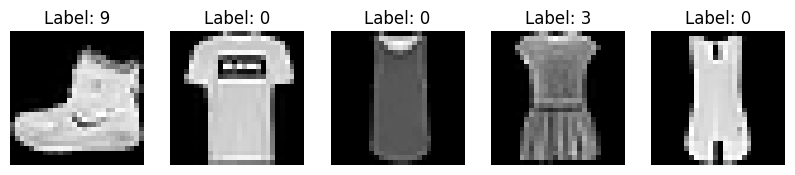

In [ ]:
# Visualize samples from FashionMNIST
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train_fashion[i].squeeze(), cmap='gray')
    ax.set_title(f"Label: {y_train_fashion[i]}")
    ax.axis('off')
plt.show()

# STEP 2 - Convolutional Neural Network (CNN) Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# CNN Model Implementation
def build_cnn_model(input_shape=(28, 28, 1)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

cnn_model = build_cnn_model()
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the CNN

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
 #Training on MNIST
history_mnist = cnn_model.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=64,validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.8757 - loss: 0.4203 - val_accuracy: 0.9795 - val_loss: 0.0633
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.9814 - loss: 0.0582 - val_accuracy: 0.9858 - val_loss: 0.0472
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9880 - loss: 0.0389 - val_accuracy: 0.9856 - val_loss: 0.0413
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9908 - loss: 0.0294 - val_accuracy: 0.9865 - val_loss: 0.0390
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9878 - val_loss: 0.0354
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9900 - val_loss: 0.0298
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.9959 - loss: 0.0123 - val_accuracy: 0.9896 - val_loss: 0.0338
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9969 - loss: 0.0096 - 

In [ ]:
# Training on FashionMNIST
history_fashion = cnn_model.fit(x_train_fashion, y_train_fashion, epochs=10, batch_size=64,validation_data=(x_test_fashion, y_test_fashion))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.7930 - loss: 0.6432 - val_accuracy: 0.8707 - val_loss: 0.3558
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.8908 - loss: 0.2988 - val_accuracy: 0.8873 - val_loss: 0.3125
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.9053 - loss: 0.2574 - val_accuracy: 0.8970 - val_loss: 0.2870
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9159 - loss: 0.2265 - val_accuracy: 0.8987 - val_loss: 0.2774
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.9236 - loss: 0.2057 - val_accuracy: 0.8995 - val_loss: 0.2753
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.9290 - loss: 0.1904 - val_accuracy: 0.9049 - val_loss: 0.2694
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.9346 - loss: 0.1754 - val_accuracy: 0.8996 - val_loss: 0.2847
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.9376 - loss: 0.1687 - 

# STEP 3 - Multi-Layer Perceptron (MLP) Model

In [ ]:
# MLP model with dense layers and dropout for regularization.
def build_mlp_model(input_shape=(28, 28)):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

mlp_model = build_mlp_model()
mlp_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the MLP
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
# Training on MNIST
history_mlp_mnist = mlp_model.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=64,
                                  validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7763 - loss: 0.7169 - val_accuracy: 0.9473 - val_loss: 0.1689
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9274 - loss: 0.2388 - val_accuracy: 0.9603 - val_loss: 0.1291
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9431 - loss: 0.1931 - val_accuracy: 0.9657 - val_loss: 0.1093
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9457 - loss: 0.1782 - val_accuracy: 0.9707 - val_loss: 0.0997
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9517 - loss: 0.1536 - val_accuracy: 0.9729 - val_loss: 0.0926
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9550 - loss: 0.1444 - val_accuracy: 0.9704 - val_loss: 0.0987
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9591 - loss: 0.1326 - val_accuracy: 0.9726 - val_loss: 0.0909
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9600 - loss: 0.1297 - val_accuracy: 0

In [ ]:
# Training on FashionMNIST
history_mlp_fashion = mlp_model.fit(x_train_fashion, y_train_fashion, epochs=10, batch_size=64, validation_data=(x_test_fashion, y_test_fashion))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5929 - loss: 1.2681 - val_accuracy: 0.7985 - val_loss: 0.5577
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7539 - loss: 0.6477 - val_accuracy: 0.8218 - val_loss: 0.5222
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7831 - loss: 0.5862 - val_accuracy: 0.8340 - val_loss: 0.4737
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8007 - loss: 0.5433 - val_accuracy: 0.8368 - val_loss: 0.4788
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8109 - loss: 0.5097 - val_accuracy: 0.8182 - val_loss: 0.4946
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8145 - loss: 0.4968 - val_accuracy: 0.8328 - val_loss: 0.4695
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8227 - loss: 0.4742 - val_accuracy: 0.8397 - val_loss: 0.4511
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8292 - loss: 0.4643 - val_accuracy: 0.

# STEP 4 - Model Comparison and Analysis

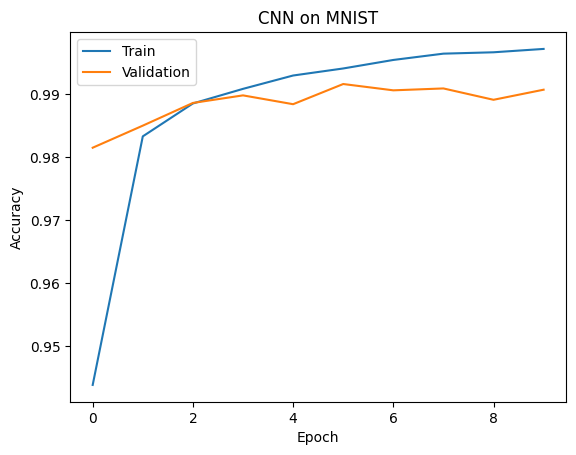

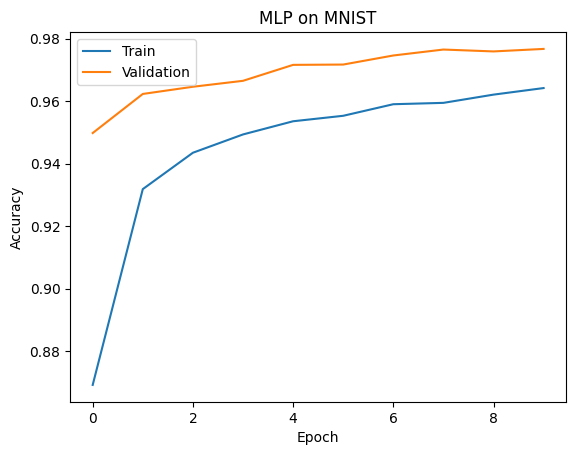

In [ ]:
# Step 4: Model Comparison and Analysis

#Plot training and validation accuracy for CNN and MLP models on both datasets.

# Function to plot model history
def plot_model_history(history, title="Model Accuracy"):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot history for CNN on MNIST
plot_model_history(history_mnist, "CNN on MNIST")

# Plot history for MLP on MNIST
plot_model_history(history_mlp_mnist, "MLP on MNIST")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


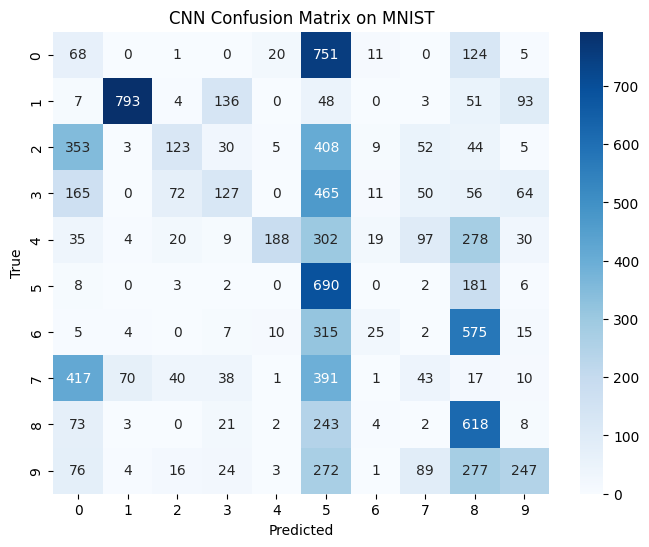

In [ ]:
# Generate and visualize the confusion matrix for each model.

from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Predictions and confusion matrix for CNN on MNIST
y_pred_cnn_mnist = cnn_model.predict(x_test_mnist).argmax(axis=1)
plot_confusion_matrix(y_test_mnist, y_pred_cnn_mnist, "CNN Confusion Matrix on MNIST")

# STEP 5 (a)- Data Augmentation Techniques for Image Processing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train_mnist)

# Use the datagen to train the model
cnn_model_augmented = build_cnn_model()
cnn_model_augmented.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

history_mnist_augmented = cnn_model_augmented.fit(datagen.flow(x_train_mnist, y_train_mnist, batch_size=64),
                                                  epochs=10, validation_data=(x_test_mnist, y_test_mnist))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 77ms/step - accuracy: 0.7880 - loss: 0.6596 - val_accuracy: 0.9808 - val_loss: 0.0633
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.9593 - loss: 0.1319 - val_accuracy: 0.9877 - val_loss: 0.0382
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 79ms/step - accuracy: 0.9724 - loss: 0.0891 - val_accuracy: 0.9894 - val_loss: 0.0333
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 93ms/step - accuracy: 0.9789 - loss: 0.0690 - val_accuracy: 0.9870 - val_loss: 0.0389
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.9811 - loss: 0.0596 - val_accuracy: 0.9884 - val_loss: 0.0376
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.9839 - loss: 0.0494 - val_accuracy: 0.9905 - val_loss: 0.0287
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 122s 71ms/step - accuracy: 0.9842 - loss: 0.0502 - val_accuracy: 0.9915 - val_loss: 0.0247
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.9853 - loss: 0.0449 - val_accura

# STEP 5 (b) - Explore transfer learning by using Pre-trained modewl VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
import cv2

# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

# Resizing function to ensure correct dimensions (32x32x3)
def resize_images(images):
    resized_images = np.zeros((images.shape[0], 32, 32, 3))  # Target shape (32, 32, 3)
    for i in range(images.shape[0]):
        # Resize from (28, 28) to (32, 32)
        resized_img = cv2.resize(images[i], (32, 32))  # Single channel
        # Convert grayscale to RGB by stacking
        resized_images[i] = np.stack([resized_img] * 3, axis=-1)  # Shape now (32, 32, 3)
    return resized_images

In [ ]:
# Apply resizing and normalize data
x_train_mnist_resized = resize_images(x_train_mnist) / 255.0
x_test_mnist_resized = resize_images(x_test_mnist) / 255.0

# Confirm the shapes of the resized images
print("Training data shape:", x_train_mnist_resized.shape)  # Should be (60000, 32, 32, 3)
print("Testing data shape:", x_test_mnist_resized.shape)    # Should be (10000, 32, 32, 3)

# Define the VGG16-based transfer learning model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze VGG16 layers

transfer_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model with resized data
history_transfer_mnist = transfer_model.fit(x_train_mnist_resized, y_train_mnist, epochs=10, batch_size=64,
                                            validation_data=(x_test_mnist_resized, y_test_mnist))


Training data shape: (60000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1004s 1s/step - accuracy: 0.7936 - loss: 0.7166 - val_accuracy: 0.9418 - val_loss: 0.1874
Epoch 2/10
284/938 ━━━━━━━━━━━━━━━━━━━━ 10:22 952ms/step - accuracy: 0.9453 - loss: 0.1920